In [2]:
from vit_prisma.visualization.visualize_attention import plot_attn_heads
from vit_prisma.utils.get_activations import get_activations, ActivationCacheHook, timmCustomAttention, CustomAttention

from vit_prisma.models.base_vit import BaseViT
from vit_prisma.configs.InductionConfig import GlobalConfig

from vit_prisma.dataloaders.induction import InductionDataset

import torch

import copy

import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Load original model
checkpoint = 0
checkpoint_path = f'/network/scratch/s/sonia.joseph/vit_prisma/induction/1_layer_attn_only/checkpoints'
file_name = f'model_{checkpoint}.pth'

config = GlobalConfig()
orig_model = BaseViT(config)

# Load dataset
testset = InductionDataset('test')
testloader = torch.utils.data.DataLoader(testset)

Loading induction dataset from cache... ../data/induction/all_test.npz


In [11]:
from vit_prisma.utils.get_activations import timmCustomAttention


ImportError: cannot import name 'timmCustomAttention' from 'vit_prisma.utils.get_activations' (/home/mila/s/sonia.joseph/ViT-Planetarium/src/vit_prisma/utils/get_activations.py)

In [3]:
# Function that goes through checkpoints and plots each attention head

activations_all_cp = []
for f in os.listdir(checkpoint_path):

    orig_model = BaseViT(config)
    state_dict = torch.load(os.path.join(checkpoint_path, f), map_location=torch.device('cpu'))['model_state_dict']
    orig_model.load_state_dict(state_dict)
    
    # Replace original model's attention with hooked attention
    model = copy.deepcopy(orig_model)
    for idx, block in enumerate(model.blocks):
        model.blocks[idx].attention = CustomAttention(config)

    # Reset attention with pretrained weights from original model.
    model.load_state_dict(orig_model.state_dict())
    activations = get_activations(model, model.blocks[idx].attention.attn_scores, testloader, max_count=100, use_cuda=False)

    activations_all_cp.append(activations)

 15%|█▌        | 100/656 [00:04<00:23, 23.25it/s]


model_0.pth
model_12768.pth
model_25536.pth
model_38304.pth
model_51072.pth
model_63840.pth
model_76592.pth
model_89360.pth
checkpoint model_0.pth
Total Min: -0.15016141533851624, Total Max: 0.23890624940395355


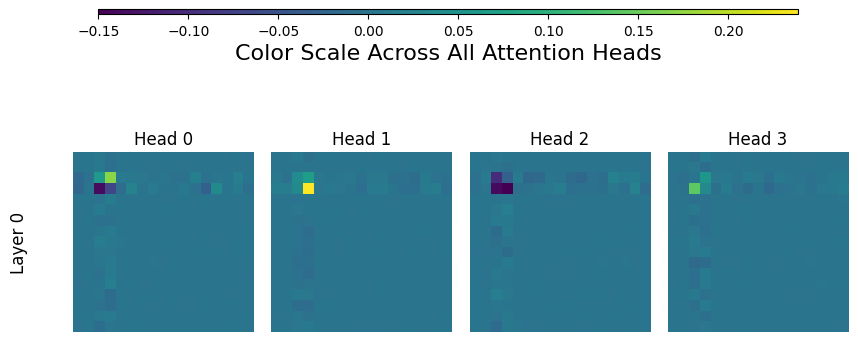

checkpoint model_12768.pth
Total Min: -2.088911771774292, Total Max: 0.33073413372039795


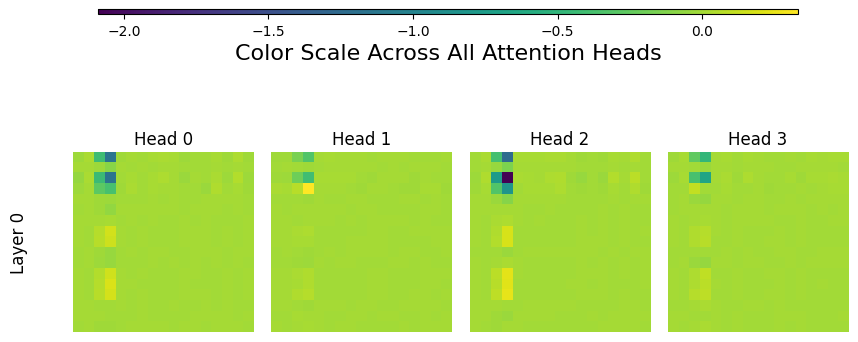

checkpoint model_25536.pth
Total Min: -16.876934051513672, Total Max: 2.058380126953125


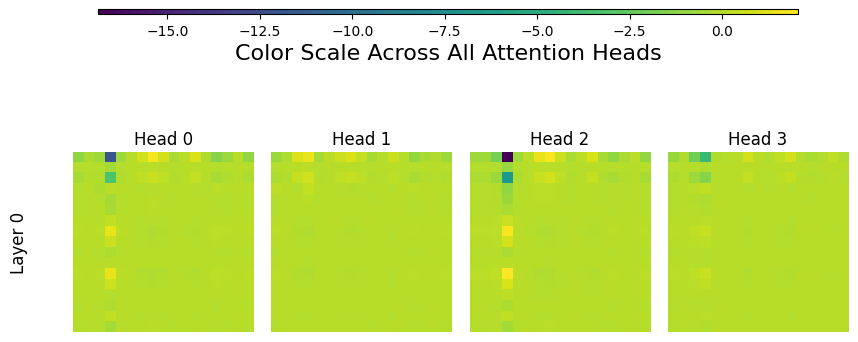

checkpoint model_38304.pth
Total Min: -17.569379806518555, Total Max: 10.402359008789062


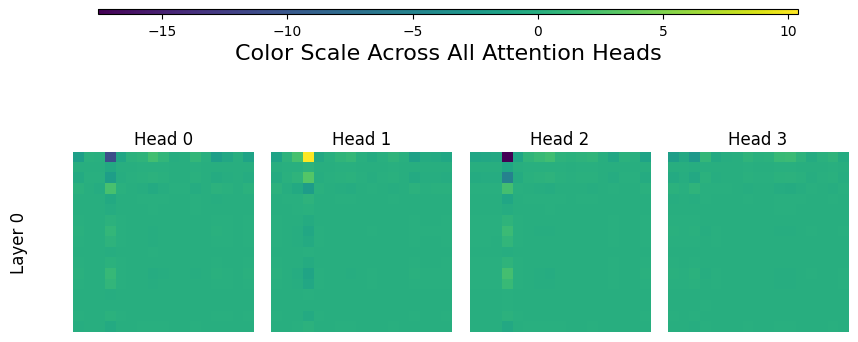

checkpoint model_51072.pth
Total Min: -17.968402862548828, Total Max: 17.263460159301758


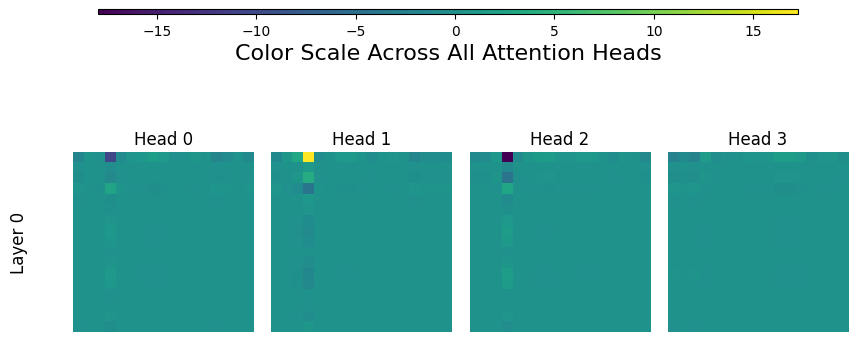

checkpoint model_63840.pth
Total Min: -18.573537826538086, Total Max: 19.676124572753906


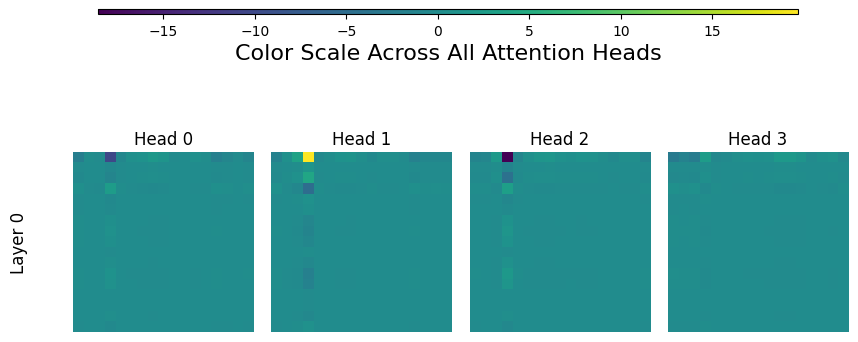

checkpoint model_76592.pth
Total Min: -19.977890014648438, Total Max: 21.350244522094727


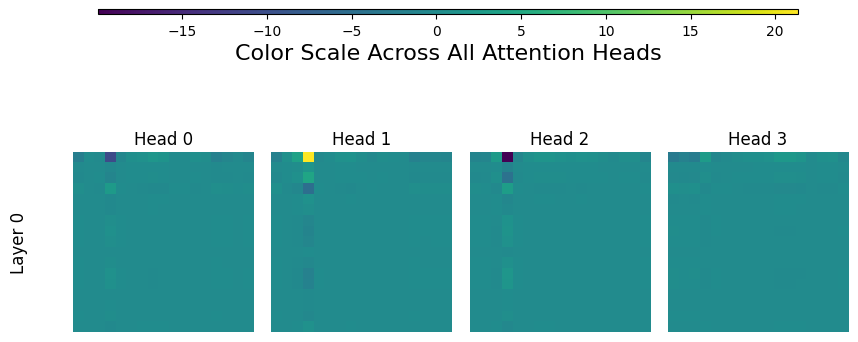

checkpoint model_89360.pth
Total Min: -20.533763885498047, Total Max: 22.478315353393555


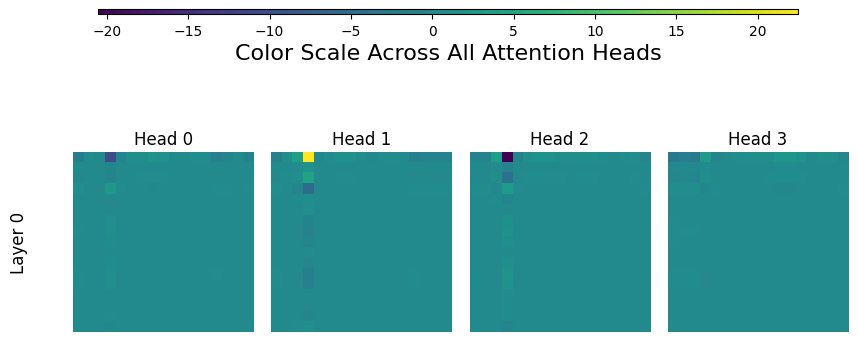

In [4]:
checkpoint_names = []
for f in os.listdir(checkpoint_path):
    print(f)
    checkpoint_names.append(f)

for cp, name in zip(activations_all_cp, checkpoint_names):
    print('checkpoint', name)
    plot_attn_heads([cp], idx=100, img_shape=17, global_min_max=True)

In [5]:
# import numpy as np
# import string, random, json

# def convert_to_3_channels(image):
#     # Check if the image has only one channel (grayscale)
#     if image.shape[-1] == 1:
#         # Stack the grayscale image three times along the third axis to make it 3-channel
#         image = np.squeeze(image)
#         image = np.stack([image, image, image], axis=-1)
#     return image

# def prepare_image(image):
#     image = image.numpy()
#     image = (image - image.min()) / (image.max() - image.min()) * 255
#     image = image.astype('uint8')
#     image = np.transpose(image, (1, 2, 0))
#     image = convert_to_3_channels(image)
#     return image

# def generate_random_string(length=10):
#     '''
#     Helper function to generate canvas IDs for javascript figures.
#     '''
#     letters = string.ascii_lowercase
#     return ''.join(random.choice(letters) for i in range(length))

# def prepare_image(image):
#     image = image.numpy()
#     image = (image - image.min()) / (image.max() - image.min()) * 255
#     image = image.astype('uint8')
#     image = np.transpose(image, (1, 2, 0))
#     image = convert_to_3_channels(image)
#     return image

# def flatten_into_patches(image, patch_size, image_size):
#     patches = [image[i:i+patch_size, j:j+patch_size, :] for i in range(0, image_size, patch_size) for j in range(0, image_size, patch_size)]
#     flattened_patches = [patch.flatten().tolist() for patch in patches]
#     return flattened_patches

# def normalize_attn_head(attn_head):
#     min_val = np.min(attn_head)
#     max_val = np.max(attn_head)
#     normalized_attn_head = (attn_head - min_val) / (max_val - min_val)
#     return normalized_attn_head

# def plot_javascript(attn_head, image, ATTN_SCALING=20, cls_token=True):

#     # if not cls_token:
#     #     attn_head = attn_head[1:, 1:]
#     #     offset = 0
#     # else:
#     #     offset = 1

#     num_patches = len(attn_head) 
#     image_size = len(image[-1]) 
#     patch_size = int(image_size // np.sqrt(num_patches-1)) 
#     num_patch_width = image_size // (patch_size-1)

#     print("num_patches", num_patches)
#     print("patch_size", patch_size)

#     canvas_img_id = generate_random_string()
#     canvas_attn_id = generate_random_string()

#     image = prepare_image(image)
#     flattened_patches = flatten_into_patches(image, patch_size, image_size)
#     normalized_attn_head = normalize_attn_head(attn_head)
#     patches_json = json.dumps(flattened_patches)

#     if not cls_token:
#         normalized_attn_head = normalized_attn_head[1:, 1:]
#         num_patches = len(normalized_attn_head)

#     attn_head_json = json.dumps(normalized_attn_head.tolist())

#     html_code = generate_html_and_js_code(patches_json, attn_head_json, canvas_img_id, canvas_attn_id, 
#     image_size, patch_size, num_patch_width, num_patches, ATTN_SCALING, cls_token=cls_token)
#     return html_code

# def patch_to_img():
#     return f"""
#     function patchToImageData(patch, width, height) {{
#                 var imgData = new ImageData(width, height);
#                 var data = imgData.data;
#                 for (let p = 0, q = 0; p < patch.length; p += 3, q += 4) {{
#                     data[q] = patch[p];
#                     data[q + 1] = patch[p + 1];
#                     data[q + 2] = patch[p + 2];
#                     data[q + 3] = 255;
#                 }}
#                 return imgData;
#             }}

#     """
# def get_color():
#     return f"""
#     function getColor(intensity) {{
#             const viridisColorMap = [
#                 {{pos: 0, rgb: [68, 1, 84]}} ,
#                 {{pos: 0.1, rgb: [72, 34, 115]}},
#                 {{pos: 0.2, rgb: [64, 67, 135]}},
#                 {{pos: 0.3, rgb: [52, 94, 141]}},
#                 {{pos: 0.4, rgb: [41, 120, 142]}},
#                 {{pos: 0.5, rgb: [32, 144, 140]}},
#                 {{pos: 0.6, rgb: [34, 167, 132]}},
#                 {{pos: 0.7, rgb: [68, 190, 112]}},
#                 {{pos: 0.8, rgb: [121, 209, 81]}},
#                 {{pos: 0.9, rgb: [189, 222, 38]}},
#                 {{pos: 1.0, rgb: [253, 231, 37]}}
#             ];

#             for (let i = 0; i < viridisColorMap.length - 1; i++) {{
#                 const start = viridisColorMap[i];
#                 const end = viridisColorMap[i + 1];
#                 if (intensity >= start.pos && intensity < end.pos) {{
#                     const ratio = (intensity - start.pos) / (end.pos - start.pos);
#                     const r = Math.floor(start.rgb[0] + ratio * (end.rgb[0] - start.rgb[0]));
#                     const g = Math.floor(start.rgb[1] + ratio * (end.rgb[1] - start.rgb[1]));
#                     const b = Math.floor(start.rgb[2] + ratio * (end.rgb[2] - start.rgb[2]));
#                     return `rgba(${{r}}, ${{g}}, ${{b}}, 1.0)`;
#                 }}
#             }}
#             return `rgba(253, 231, 37, 1.0)`;
#         }}

#     """


    
# def generate_html_and_js_code(patches_json, attn_head_json, canvas_img_id, canvas_attn_id, 
#     image_size, patch_size, num_patch_width, num_patches, ATTN_SCALING, cls_token=True):
#     html_code = f"""
#     <div style="display: flex;">
#         <canvas id="{canvas_attn_id}" width="{num_patches*ATTN_SCALING}" height="{num_patches*ATTN_SCALING}" style="width:{num_patches*ATTN_SCALING+20}px; height:{num_patches*ATTN_SCALING+20}px;"></canvas>
#         <canvas id="{canvas_img_id}" width="{image_size}" height="{image_size}" style="width:{image_size+20}px; height:{image_size+20}px;"></canvas>
#     </div>
#     <script>
#         {patch_to_img()}
#         {get_color()}

#         var colorTokenA = 'rgba(0, 128, 128, 0.8)'; //teal
#         var colorTokenB = 'rgba(255, 105, 180, 0.7)'; //pink

#         var lastHighlightedCol = null;
#         var lastHighlightedColSecond = null;
#         var isEntireImageHighlighted = false;

#         if ({"true" if cls_token else "false"}) {{
#             var offset = 1;
#             var clsToken = true;
#         }} else {{
#             var offset = 0;
#             var clsToken = false;
#         }} 

#         var matrixColorsImg = Array({num_patch_width}).fill().map(() => Array({num_patch_width}).fill('')); // cifar image
#         var matrixColorsAttn = Array({num_patches**2}).fill().map(() => Array({num_patches**2}).fill('')); // attention head

#         // PLOT CIFAR on canvasImg
#         var patches = JSON.parse('{patches_json}');
#         var canvasImg = document.getElementById('{canvas_img_id}');
#         var ctxImg = {canvas_img_id}.getContext('2d');
#         var idx = 0;
#         for (let i = 0; i < {image_size}; i+= {patch_size}) {{
#             for (let j = 0; j < {image_size}; j += {patch_size}) {{
#                 var imgData = ctxImg.createImageData({patch_size}, {patch_size});
#                 var data = imgData.data;
#                 var patch = patches[idx];

#                 for (let p = 0, q = 0; p < patch.length; p += 3, q += 4) {{
#                     data[q] = patch[p];
#                     data[q + 1] = patch[p + 1];
#                     data[q + 2] = patch[p + 2];
#                     data[q + 3] = 255;
    
#                 }}
#                 const row = Math.floor(i / {patch_size});
#                 const col = Math.floor(j / {patch_size});

#                 // Storing the representative color for this patch.
#                 // You can use the first pixel as a representative color, or calculate the average color of the patch.
#                 matrixColorsImg[row][col] = patch

#                 ctxImg.putImageData(imgData, j, i);
#                 ctxImg.strokeStyle = 'white';
#                 ctxImg.strokeRect(j, i, {patch_size}, {patch_size});

#                 idx++;
#             }}
#         }}

#         // Plot attention head on canvasAttn
#         var attn_head = JSON.parse('{attn_head_json}');
#         var canvasAttn = document.getElementById('{canvas_attn_id}');
#         var ctxAttn = {canvas_attn_id}.getContext('2d');
#         for (let i = 0; i < {num_patches}; i++) {{
#             for (let j = 0; j < {num_patches}; j++) {{
#                 var color = getColor(attn_head[i][j]);
#                 ctxAttn.fillStyle = color;
#                 ctxAttn.fillRect(j * {ATTN_SCALING}, i * {ATTN_SCALING}, {ATTN_SCALING}, {ATTN_SCALING});
#                 matrixColorsAttn[i][j] = color;
#             }}
#         }}

#     // Add listeners for highlighted pixels
#     canvasAttn.addEventListener('mousemove', function(event) {{

#               if (lastHighlightedCol !== null) {{
#             const prevrowImg = Math.floor((lastHighlightedCol - offset) / {num_patch_width});
#             const prevcolImg = (lastHighlightedCol - offset) % {num_patch_width};
#             var originalPatch = matrixColorsImg[prevrowImg][prevcolImg];
#             var imgData = patchToImageData(originalPatch, {patch_size}, {patch_size});

#             ctxImg.putImageData(imgData, prevcolImg * {patch_size}, prevrowImg * {patch_size});
#             ctxImg.strokeStyle = 'white';
#             ctxImg.strokeRect(prevcolImg*{patch_size}, prevrowImg*{patch_size}, {patch_size}, {patch_size});

#             // Fill in attn matrix
#             ctxAttn.fillStyle = matrixColorsAttn[lastHighlightedCol][lastHighlightedColSecond];
#             ctxAttn.fillRect(lastHighlightedColSecond * {ATTN_SCALING}, lastHighlightedCol * {ATTN_SCALING}, {ATTN_SCALING}, {ATTN_SCALING});

#         }}

#         if (lastHighlightedColSecond !== null) {{
#             const prevrowImg = Math.floor((lastHighlightedColSecond - offset) / {num_patch_width});
#             const prevcolImg = (lastHighlightedColSecond - offset) % {num_patch_width};
#             var originalPatch = matrixColorsImg[prevrowImg][prevcolImg];
#             var imgData = patchToImageData(originalPatch, {patch_size}, {patch_size});

#             ctxImg.putImageData(imgData, prevcolImg * {patch_size}, prevrowImg * {patch_size});
#             ctxImg.strokeStyle = 'white';
#             ctxImg.strokeRect(prevcolImg*{patch_size}, prevrowImg*{patch_size}, {patch_size}, {patch_size});

#         }}

#             var x = Math.floor(event.offsetY / {ATTN_SCALING});
#             if (x === 0 && clsToken) {{
#                 lastHighlightedCol = null;
#                 return;
#             }}
#             const rowImg = Math.floor((x - offset) / {num_patch_width});
#             const colImg = (x - offset) % {num_patch_width};

#             var y = Math.floor(event.offsetX / {ATTN_SCALING});
#             if (y === 0 && clsToken) {{
#                 lastHighlightedColSecond = null;
#                 return;
#             }}

#             const rowImgSecond = Math.floor((y - offset) / {num_patch_width});
#             const colImgSecond = (y - offset) % {num_patch_width};

#         if (lastHighlightedCol !== null) {{
#             const prevrowImg = Math.floor((lastHighlightedCol - offset) / {num_patch_width});
#             const prevcolImg = (lastHighlightedCol - offset) % {num_patch_width};
#             var originalPatch = matrixColorsImg[prevrowImg][prevcolImg];
#             var imgData = patchToImageData(originalPatch, {patch_size}, {patch_size});

#             ctxImg.putImageData(imgData, prevcolImg * {patch_size}, prevrowImg * {patch_size});
#             ctxImg.strokeStyle = 'white';
#             ctxImg.strokeRect(prevcolImg*{patch_size}, prevrowImg*{patch_size}, {patch_size}, {patch_size});

#             // Fill in attn matrix
#             ctxAttn.fillStyle = matrixColorsAttn[lastHighlightedCol][lastHighlightedColSecond];
#             ctxAttn.fillRect(lastHighlightedColSecond * {ATTN_SCALING}, lastHighlightedCol * {ATTN_SCALING}, {ATTN_SCALING}, {ATTN_SCALING});

#         }}

#         if (lastHighlightedColSecond !== null) {{
#             const prevrowImg = Math.floor((lastHighlightedColSecond - offset) / {num_patch_width});
#             const prevcolImg = (lastHighlightedColSecond - offset) % {num_patch_width};
#             var originalPatch = matrixColorsImg[prevrowImg][prevcolImg];
#             var imgData = patchToImageData(originalPatch, {patch_size}, {patch_size});

#             ctxImg.putImageData(imgData, prevcolImg * {patch_size}, prevrowImg * {patch_size});
#             ctxImg.strokeStyle = 'white';
#             ctxImg.strokeRect(prevcolImg*{patch_size}, prevrowImg*{patch_size}, {patch_size}, {patch_size});

#         }}

#         lastHighlightedCol = x;
#         lastHighlightedColSecond = y;  //

#         ctxImg.fillStyle = colorTokenA;
#         ctxImg.fillRect(colImg * {patch_size}, rowImg * {patch_size}, {patch_size}, {patch_size});

#         ctxImg.fillStyle = colorTokenB;
#         ctxImg.fillRect(colImgSecond * {patch_size}, rowImgSecond * {patch_size}, {patch_size}, {patch_size});  // Second highlighted pixel

#         ctxAttn.fillStyle = 'white';
#         ctxAttn.fillRect(y * {ATTN_SCALING}, x * {ATTN_SCALING}, {ATTN_SCALING}, {ATTN_SCALING});

#         }}, {{ passive: true }});

#         canvasAttn.addEventListener('mouseout', function() {{

#             if (lastHighlightedCol !== null) {{

#                 const prevrowImg = Math.floor((lastHighlightedCol - offset)/ {num_patch_width});
#                 const prevcolImg = (lastHighlightedCol - offset) % {num_patch_width};

#                 if (matrixColorsImg[prevrowImg] && matrixColorsImg[prevrowImg][prevcolImg]) {{

#                     // Fill in rectangle for img
#                     var originalPatch = matrixColorsImg[prevrowImg][prevcolImg];
#                     var imgData = patchToImageData(originalPatch, {patch_size}, {patch_size});
#                     ctxImg.putImageData(imgData, prevcolImg * {patch_size}, prevrowImg * {patch_size});
#                     ctxImg.strokeStyle = 'white';
#                     ctxImg.strokeRect(prevcolImg * {patch_size}, prevrowImg * {patch_size}, {patch_size}, {patch_size});

#                     // Fill in attn matrix
#                     ctxAttn.fillStyle = matrixColorsAttn[lastHighlightedCol][lastHighlightedColSecond];
#                     ctxAttn.fillRect(lastHighlightedColSecond * {ATTN_SCALING}, lastHighlightedCol * {ATTN_SCALING}, {ATTN_SCALING}, {ATTN_SCALING});
#                 }}
#             }}

#             if (lastHighlightedColSecond !== null) {{
#                 const prevrowImg = Math.floor((lastHighlightedColSecond - offset) / {num_patch_width});
#                 const prevcolImg = (lastHighlightedColSecond - offset) % {num_patch_width};

#                 if (matrixColorsImg[prevrowImg] && matrixColorsImg[prevrowImg][prevcolImg]) {{
#                     // Fill in rectangle for img
#                     var originalPatch = matrixColorsImg[prevrowImg][prevcolImg];
#                     var imgData = patchToImageData(originalPatch, {patch_size}, {patch_size});
#                     ctxImg.putImageData(imgData, prevcolImg * {patch_size}, prevrowImg * {patch_size});
#                     ctxImg.strokeStyle = 'white';
#                     ctxImg.strokeRect(prevcolImg * {patch_size}, prevrowImg * {patch_size}, {patch_size}, {patch_size});

#                     // Fill in attn matrix
#                     ctxAttn.fillStyle = matrixColorsAttn[lastHighlightedCol][lastHighlightedColSecond];
#                     ctxAttn.fillRect(lastHighlightedColSecond * {ATTN_SCALING}, lastHighlightedCol * {ATTN_SCALING}, {ATTN_SCALING}, {ATTN_SCALING});
#                 }}

#             }}

#             lastHighlightedCol = null;
#             lastHighlightedColSecond = null;  // Reset this too

#         }}, {{ passive: true }});



#     </script>
#     """

#     return html_code



In [6]:
from vit_prisma.visualization.visualize_attention_js import plot_javascript

In [7]:
from IPython.core.display import display, HTML

idx = 0

for head_idx in range(1):
    attn_head = activations_all_cp[-1][idx][head_idx]
    html_code = plot_javascript(attn_head, image=testset[idx][0], cls_token=True)
    display(HTML(html_code))


num_patches 17
patch_size 8
